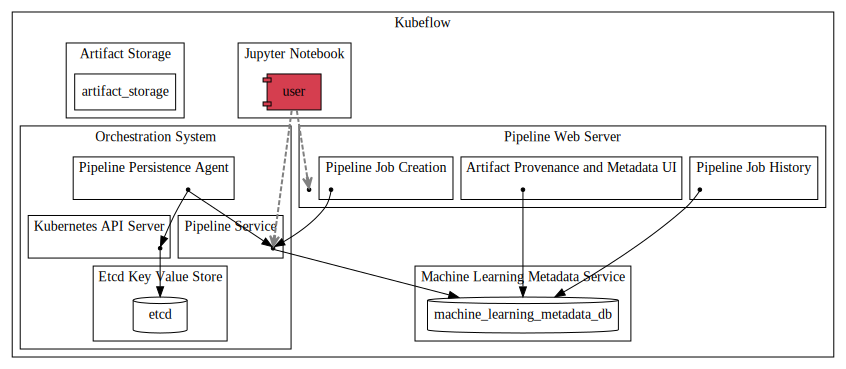

In [1]:
# kubeflow pipelines documentation https://v1-5-branch.kubeflow.org/docs/components/pipelines/introduction/#architectural-overview

# kserve control pane https://kserve.github.io/website/0.9/modelserving/control_plane/


import graphviz as gv
from IPython.display import display

source = '''
digraph D {

  subgraph cluster_p {
    label = "Kubeflow";

    subgraph cluster_c1 {
      label = "Pipeline Web Server";
      pipeline_web_server [shape=point];

      subgraph cluster_gc_1 {
        label = "Pipeline Job Creation";
         pipeline_job_creation [shape=point];
      }
      subgraph cluster_gc_2 {
        label = "Pipeline Job History";
          pipeline_job_history [shape=point];
      }
      subgraph cluster_gc_3 {
        label = "Artifact Provenance and Metadata UI";
          artifact_provenance [shape=point];
      }      

    }

    subgraph cluster_c2 {
      label = "Jupyter Notebook";
      node [shape=plaintext, style=filled, colorscheme=spectral9,fillcolor=1];   
      user [shape=component];
    }
    
    subgraph cluster_c3 {
      label = "Machine Learning Metadata Service";
      machine_learning_metadata_db [shape=cylinder];
    }
    
    subgraph cluster_c4 {
      label = "Orchestration System";
      
        subgraph cluster_c4_g1 {
        label = "Pipeline Service";
          pipeline_service [shape=point];
      }      

        subgraph cluster_c4_g2 {
        label = "Kubernetes API Server";
          kubernetes_api_server [shape=point];
      }
      
        subgraph cluster_c4_g3 {
        label = "Etcd Key Value Store";
          etcd [shape=cylinder];
      }      

        subgraph cluster_c4_g4 {
        label = "Pipeline Persistence Agent";
          pipeline_persistence_agent [shape=point];
      } 

    }

    subgraph cluster_c5 {
      label = "Artifact Storage";
      artifact_storage [shape=box];
    }

    
  }

    user -> pipeline_web_server
    [style=dashed,penwidth=2,arrowhead=vee,arrowtail=box,color=grey];    
    user -> pipeline_service
    [style=dashed,penwidth=2,arrowhead=vee,arrowtail=box,color=grey];
    
    
    pipeline_job_history -> machine_learning_metadata_db
    artifact_provenance -> machine_learning_metadata_db
    pipeline_job_creation -> pipeline_service
    kubernetes_api_server -> etcd
    pipeline_persistence_agent -> kubernetes_api_server
    pipeline_persistence_agent -> pipeline_service

    pipeline_service -> machine_learning_metadata_db

} 
'''

gvz=gv.Source(source)
display(gvz)